# Exploratory Data Analysis of Article-Level Dataset

The article-level dataset provides a rich amountt of information about articles on the content-level, such as the formatting, text, code, and resources (images/links). It is thus worth conducting an analysis on the article level.

# Import modules

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display, HTML
import seaborn as sns
import math

from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from collections import Counter
pd.options.display.max_seq_items = None
pd.options.display.max_colwidth = 1000000

from scipy import stats


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


# Read dataset

In [5]:
df = pd.read_csv("../../data/features_analysis/df_story_features_analysis_whole.csv", low_memory = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5972614 entries, 0 to 5972613
Columns: 103 entries, AuthorArticlesClap_count to isPublication
dtypes: float64(54), int64(34), object(15)
memory usage: 4.6+ GB


In [8]:
df.head()

Index(['AuthorArticlesClap_count', 'AuthorArticlesClap_mean',
       'AuthorArticlesClap_median', 'AuthorArticlesClap_sum',
       'AuthorArticlesResponse_count', 'AuthorArticlesResponse_mean',
       'AuthorArticlesResponse_median', 'AuthorArticlesResponse_sum',
       'AuthorArticlesVoter_count', 'AuthorArticlesVoter_mean',
       'AuthorArticlesVoter_median', 'AuthorArticlesVoter_sum', 'BoldNum',
       'ClapCount_Card', 'ClapCount_Story', 'CodeBlockLengthMax',
       'CodeBlockLengthMean', 'CodeBlockLengthMedian', 'CodeBlockLengthMin',
       'CodeBlockLengthStd', 'CodeBlockLengthSum', 'CodeBlockNum',
       'CodeBlockRaw', 'CodeInlineNum', 'CodeInlineRaw', 'Company',
       'CompanyURL', 'HLightTextList', 'HasFeaturedImage', 'HlightNum',
       'ImgNum', 'ItalicNum', 'LinkNum', 'LinkURLList', 'ListOlLength',
       'ListOlMax', 'ListOlMean', 'ListOlMedian', 'ListOlMin', 'ListOlNum',
       'ListOlStd', 'ListOlSum', 'ListUlLength', 'ListUlMax', 'ListUlMean',
       'ListUlMedian', 

# Analysis

## Claps

### The median / mean number of claps is 1 / 70, and almost half of all articles have zero claps.

Median number of claps: 1.0
Mean number of claps: 69.78024580192191


Percentage of articles that have no claps:  48.25213884573823
Percentage of articles that have at least one clap:  51.74786115426177
Percentage of articles that have at least 10 claps:  27.34886265879563
Percentage of articles that have at least 100 claps:  10.625129968218271
Percentage of articles that have at least 1000 claps:  1.142447846118969


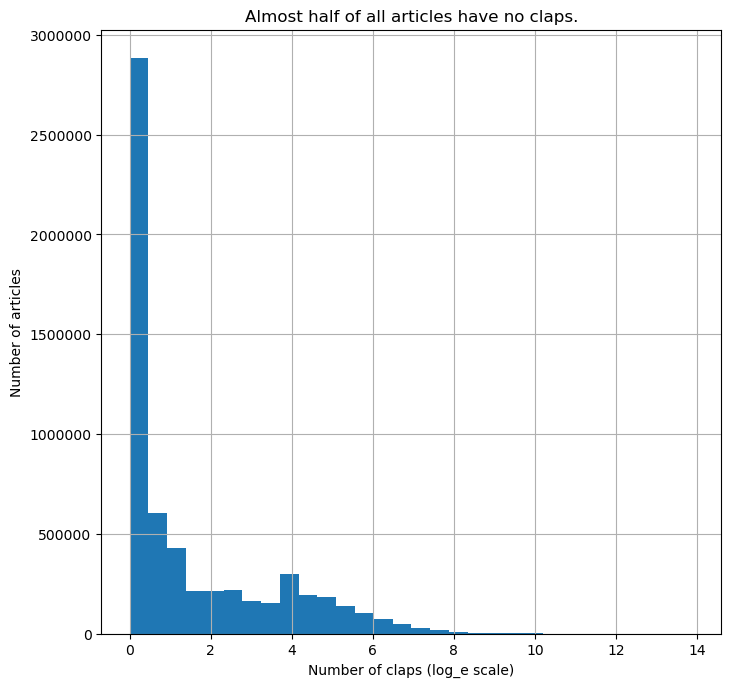

In [115]:
print("Median number of claps:", df.ClapCount_Story.median())
print("Mean number of claps:", df.ClapCount_Story.mean())

print("\n")
print("Percentage of articles that have no claps: ", 100 * len(df[df.ClapCount_Story == 0])/len(df))
print("Percentage of articles that have at least one clap: ", 100 * len(df[df.ClapCount_Story >= 1])/len(df))
print("Percentage of articles that have at least 10 claps: ", 100 * len(df[df.ClapCount_Story >= 10])/len(df))
print("Percentage of articles that have at least 100 claps: ", 100 * len(df[df.ClapCount_Story >= 100])/len(df))
print("Percentage of articles that have at least 1000 claps: ", 100 * len(df[df.ClapCount_Story >= 1000])/len(df))

np.log1p(df.ClapCount_Story).hist(bins=30);
plt.title("Almost half of all articles have no claps.");
plt.xlabel("Number of claps (log_e scale)");
plt.ylabel("Number of articles");

# Text Dimension

Aspects: Word count and readability, sentiment

## Sentiment

### The majority of articles are skewed towards positive sentiment (higher polarity) and more factual style of writing (lower subjectivity).

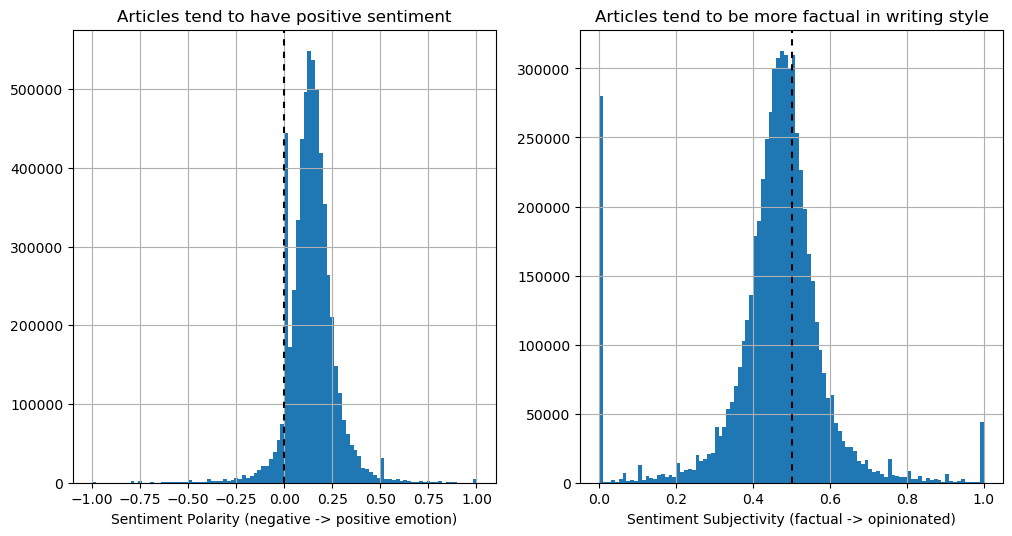

In [113]:
fig, ax = plt.subplots(1,2, figsize=(12, 6));
# figure(figsize=(10,8))

df.SentimentPolarity.hist(bins=100, ax=ax[0]);
ax[0].set_title("Articles tend to have positive sentiment");
ax[0].set_xlabel("Sentiment Polarity (negative -> positive emotion)");
ax[0].axvline(0, c="Black", dashes=[3, 3]);

df.SentimentSubjectivity.hist(bins=100, ax=ax[1]);
ax[1].set_title("Articles tend to be more factual in writing style");
ax[1].set_xlabel("Sentiment Subjectivity (factual -> opinionated)");
ax[1].axvline(0.5, c="Black", dashes=[3, 3]);

## Readability and Word Count

### The median article has 527 words.

Median number of words 526.9999999999999


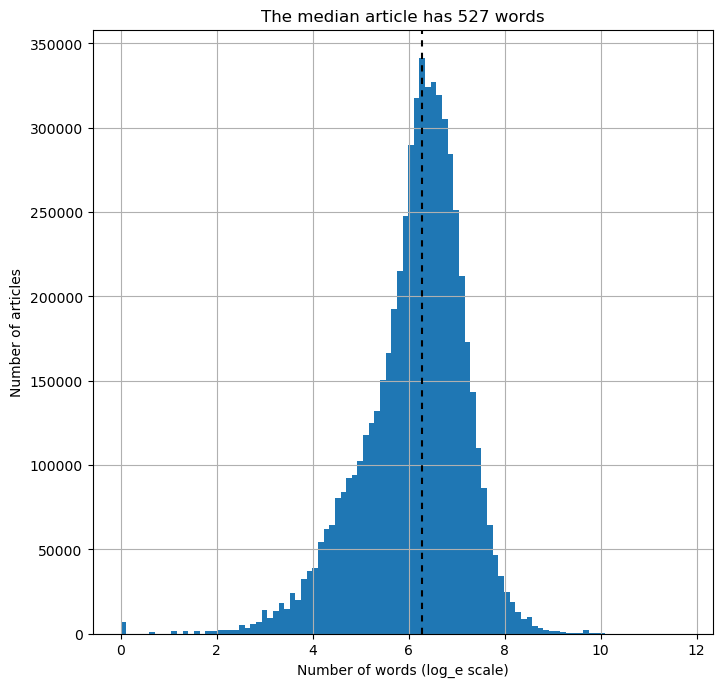

In [114]:
y = np.log(df.WordNum);
print("Median number of words", np.e**y.median());
ax = y.hist(bins=100);
ax.set_title("The median article has 527 words");
ax.set_xlabel("Number of words (log_e scale)");
ax.set_ylabel("Number of articles");
ax.axvline(y.median(), c="Black", dashes=[3, 3]);

### Using #syllables / #words as a measure of word length in an article

### Articles with abnormally high syllables per word (>50) appear to be long lists of links, some of which are useful, some of which are spam

Articles with abnormally high syllables per word:
2142875             https://medium.com/@ZachSchleien/subreddits-for-mental-illness-6d48f5766d9a?source=tag_archive---------0-----------------------#--responses
4243633                  https://medium.com/@turhalnakliyatt/i%CC%87stanbul-evden-eve-nakliyat-51116314c444?source=tag_archive---------7-----------------------
1179854                            https://medium.com/@bitcoin4dollar.tbc/exchange-bewertung-b7c0b5c57bf2?source=tag_archive---------170-----------------------
424203       https://medium.com/@learnreact/inline-styles-for-basic-pseudo-classes-ee8f564792d4?source=tag_archive---------0-----------------------#--responses
1806147    https://medium.com/@vaiperzeli/easy-ways-amazon-gift-card-2019-2020-free-generator-bd198a2fbe2e?source=tag_archive---------87-----------------------
Name: StoryURL, dtype: object
Median number of syllables per word is:  1.5268817204301075


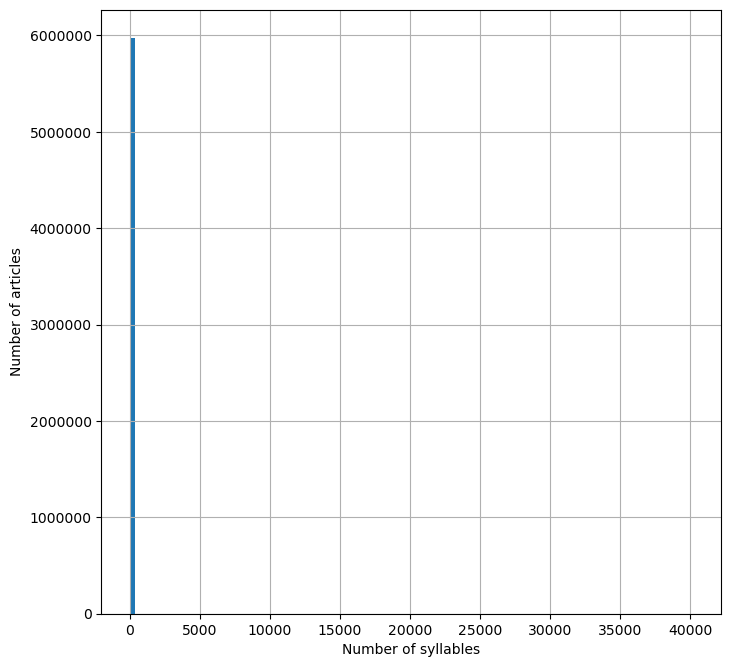

In [165]:
df['TextSyllablePerWord'] = df.TextSyllableNum/df.TextLexiconNum;
print("Articles with abnormally high syllables per word:")
print(df[df['TextSyllablePerWord'] > 50].sort_values(by = "TextSyllablePerWord", ascending=True).head(5).StoryURL)
y = df['TextSyllablePerWord']

print("Median number of syllables per word is: ", y.median());
ax = y.hist(bins=100);
ax.set_xlabel("Number of syllables");
ax.set_ylabel("Number of articles");


## Readabity metrics show that Medium articles tend to be complex in readability level

The readability formulas were calculated using textstat. [Reference on the readability formulas used here](https://pypi.org/project/textstat/)

Most of the readability formulas calculate a grade level, meaning that a higher number means more complex, except for FleschEase, where higher number means more readable.

The readability formulas show that the median readability of Medium articles is quite complex, understood by a high school student to college student (Grade 8-15). This is not surprising given that SE related articles may involve lots of technical jargon, and the length of articles (as shown in the distribution of word count) 

Median of ReadabilityColemanLiau 2.533696813957432
Median of ReadabilityConsensus 2.6390573296152584
Median of ReadabilityDaleChall 2.1016921506146558
Median of ReadabilityDifficultWordsNum 4.532599493153256
Median of ReadabilityFleschEase 3.855452653939752
Median of ReadabilityFleschKincaid 2.7013612129514133
Median of ReadabilityGunningFog 2.7631695003232895
Median of ReadabilityLinsearWriteFormula 2.803360380906535
Median of ReadabilityReadingTime 3.731938943574383
Median of ReadabilitySMOG 2.6602595372658615


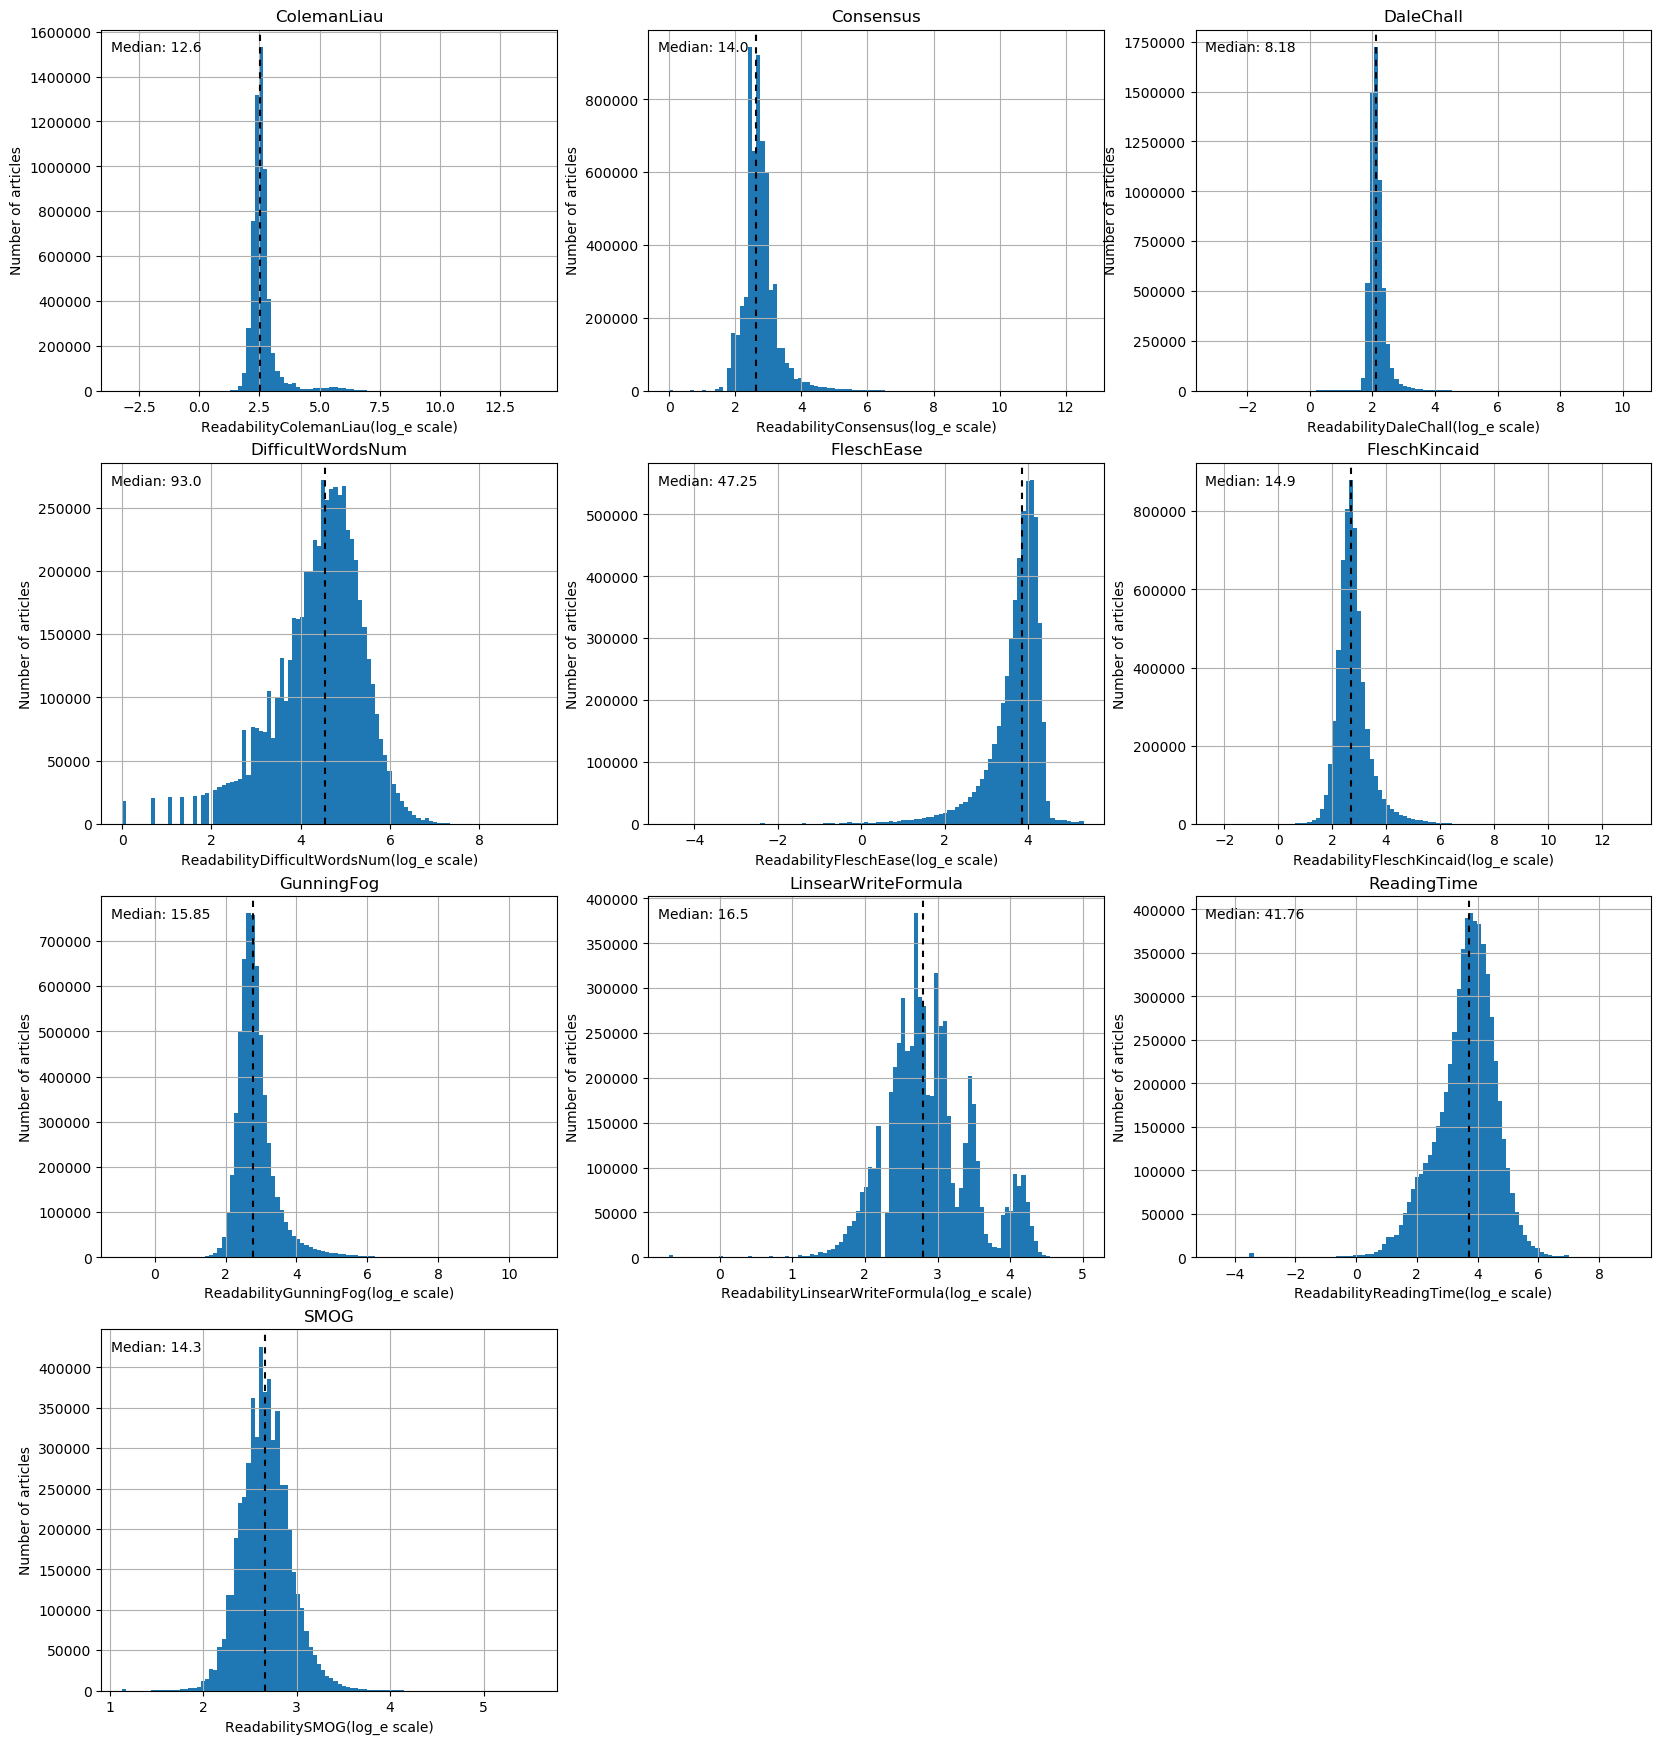

In [257]:
readabilityFeatures = ['ReadabilityARI', 'ReadabilityColemanLiau',
       'ReadabilityConsensus', 'ReadabilityDaleChall',
       'ReadabilityDifficultWordsNum', 'ReadabilityFleschEase',
       'ReadabilityFleschKincaid', 'ReadabilityGunningFog',
       'ReadabilityLinsearWriteFormula', 'ReadabilityReadingTime',
       'ReadabilitySMOG']

# fig, ax = plt.subplots(len(readabilityFeatures),1, figsize=(12, 12));


fig = plt.figure(figsize=(20,22));

for i in range(1, len(readabilityFeatures)):
    ax = fig.add_subplot(4,3,i);
    
    y = np.log(df[readabilityFeatures[i]]).replace(-np.inf, np.nan).dropna();
    print("Median of", readabilityFeatures[i], y.median());
    # df.boxplot("ReadabilityConsensus")
#     print(y.describe())
    _ =ax = y.hist(bins=100);
    _ = ax.set_title(readabilityFeatures[i].replace("Readability", ""));
    _ = ax.set_xlabel( str(readabilityFeatures[i]+ "(log_e scale)"));
    _ = ax.set_ylabel("Number of articles");
    _ = ax.text(0.02, 0.95, s= str("Median: " + str(round(np.e**y.median(), 3))), ha='left', va='center', transform=ax.transAxes)
    _ = ax.axvline(y.median(), c="Black", dashes=[3, 3]);